In [12]:
# NO CODE

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [13]:
# NO CODE

pulse = Table.read_table('../../data/pulse.csv').drop(0)
m_smokers = pulse.where('Sex', 0).where('Smoke', 1)
m_data = m_smokers.to_df()
m_data
m_y = m_data[['Active']]
m_x = m_data[['Rest']]
m_x_with_int = sm.add_constant(m_x) 

## Exercises ##

**1.**
Recall that the intercept of the regression line is given by "the average of $Y$ minus the slope times the average of $x$. That is, $\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1\bar{x}$. Is $\hat{\beta}_0$ an unbiased estimator of $\beta_0$?

**2.**
The *fitted* value of the response for the $i$th indvidual is the height of the regression line at $x_i$:

$$
\hat{Y}_i ~ = ~ \hat{\beta}_0 + \hat{\beta}_1x_i
$$

Show that $\hat{Y}_i$ is an unbiased estimator of $\beta_0 + \beta_1x_i$, the height of the true line at $x_i$.

**3.** 
Refer to the regression of active pulse rate on resting pulse rate in [Section 12.2](ch12.2). Here are the estimated values again, along with some additional data.

In [4]:
active = pulse.column(0)
resting = pulse.column(1)

slope, intercept, r, p, se_slope = stats.linregress(x=resting, y=active)
slope, intercept, r, p, se_slope

(1.142879681904831,
 13.182572776013345,
 0.6041870881060092,
 1.7861044071652305e-24,
 0.09938884436389145)

In [7]:
mean_active, sd_active = np.mean(active), np.std(active)
mean_active, sd_active

(91.29741379310344, 18.779629284683832)

In [8]:
mean_resting, sd_resting = np.mean(resting), np.std(resting)
mean_resting, sd_resting

(68.34913793103448, 9.927912546587986)

**a)** Use the Data 8 formulas for the slope and intercept of the regression line (proved in the previous chapter) and confirm that you get the same values as reported by `stats.linregress`.

**b)** Find the regression estimate of the active pulse rate of a student whose resting pulse rate is 70.

**c)** Find the SD of the residuals. This is roughly the error in the estimate in Part **b**.

**4.**
Restrict the population of students in the previous exercise just to the male smokers.

In [10]:
m_smokers = pulse.where('Sex', 0).where('Smoke', 1)
m_smokers.num_rows

17

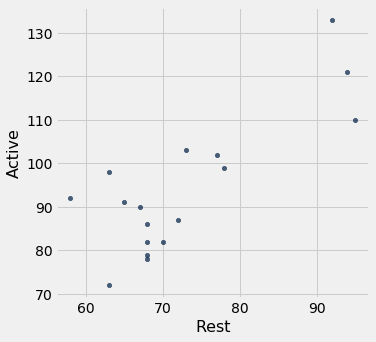

In [11]:
m_smokers.scatter(1, 0)

Here is a summary of the regression of the active pulse rate on the resting pulse rate for these data. Since the population consists just of male smokers, the parameters in the model might have different values from those in the previous exercise.

In [14]:
# NO CODE

reg4 = sm.OLS(m_y, m_x_with_int).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Active   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     27.29
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           0.000103
Time:                        12:25:30   Log-Likelihood:                -61.906
No. Observations:                  17   AIC:                             127.8
Df Residuals:                      15   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9360     16.345      0.608      0.552     -24.903      44.775
Rest           1.1591      0.222      5.224      0.000       0.686       1.632
==============================================================================
Omnibus:                        2.279   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.320   Jarque-Bera (JB):                1.423
Skew:                           0.456   Prob(JB):                        0.491
Kurtosis:                       1.915   Cond. No.                         505.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**a)** Find the correlation between the active and resting pulse rates for these data and compare it with the corresponding value for all students.

**b)** Show the calculation that leads to the displayed confidence interval for the true slope of `Rest`.

**c)** Use the displayed confidence interval for the true intercept to provide the conclusion of a test of hypotheses $H_0$: $\beta_0 = 0$ versus $H_A$: $\beta_0 \ne 0$ at the 5% level. Explain your reasoning.

**d)** Show the calculation that leads to the displayed value of `P>|t|` for the intercept. Is the value consistent with your answer to Part **c**?

**e)** Use the displayed results for the slope of `Rest` to provide the conclusion of a test of hypotheses $H_0$: $\beta_1 = 0$ versus $H_A$: $\beta_1 \ne 0$ at the 1% level. Explain your reasoning.